In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
## 데이터/라벨/한글라벨/숫자라벨 경로/파일명 지정
file_dir = 'D:\\Codestates\\section4\\project4\\Korean_commercial_letters\\phd08-conversion\\phd08_npy_results\\'
data_name = 'phd08_data_'
label_name = 'phd08_labels_'

out_data  = file_dir + data_name + '.npy'
out_label = file_dir + label_name + '.npy' 
out_label_kor = file_dir + label_name + 'kor' + '.npy'
out_label_num = file_dir + label_name + 'num' + '.npy'

## 저장된 파일 로딩 후 확인
npy_data_test = np.load(out_data)
#npy_label_test = np.load(out_label)
#npy_label_kor_test = np.load(out_label_kor)
npy_label_num_test = np.load(out_label_num)
print(npy_data_test.shape, npy_label_num_test.shape)#, npy_label_test.shape, npy_label_kor_test.shape

(1175000, 28, 28) (1175000,)


In [4]:
np.random.seed(42)
tf.random.set_seed(42)

## X_train 축 추가
X_train, y_train = npy_data_test, npy_label_num_test
y_train = y_train.astype(int)
#X_train = X_train[:1000]
#y_train = y_train[:1000]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, shuffle=True, stratify=y_train, random_state=42)


In [11]:
## 모델 생성
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape= (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2350, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [12]:
## 모델 학습
history = model.fit(X_train, y_train,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    epochs=5,
                    callbacks=[
                               ModelCheckpoint('models/model_test2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
                               ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
                              ]
                    )

Epoch 1/5
1836/1836 [==============================] - ETA: 0s - loss: 0.4375 - acc: 0.9109
Epoch 1: val_acc improved from -inf to 0.98776, saving model to models\model_test2.h5
1836/1836 [==============================] - 577s 314ms/step - loss: 0.4375 - acc: 0.9109 - val_loss: 0.0363 - val_acc: 0.9878 - lr: 0.0010
Epoch 2/5
1836/1836 [==============================] - ETA: 0s - loss: 0.0245 - acc: 0.9912
Epoch 2: val_acc improved from 0.98776 to 0.99110, saving model to models\model_test2.h5
1836/1836 [==============================] - 580s 316ms/step - loss: 0.0245 - acc: 0.9912 - val_loss: 0.0254 - val_acc: 0.9911 - lr: 0.0010
Epoch 3/5
1836/1836 [==============================] - ETA: 0s - loss: 0.0178 - acc: 0.9927
Epoch 3: val_acc improved from 0.99110 to 0.99342, saving model to models\model_test2.h5
1836/1836 [==============================] - 605s 330ms/step - loss: 0.0178 - acc: 0.9927 - val_loss: 0.0137 - val_acc: 0.9934 - lr: 0.0010
Epoch 4/5
1836/1836 [===================

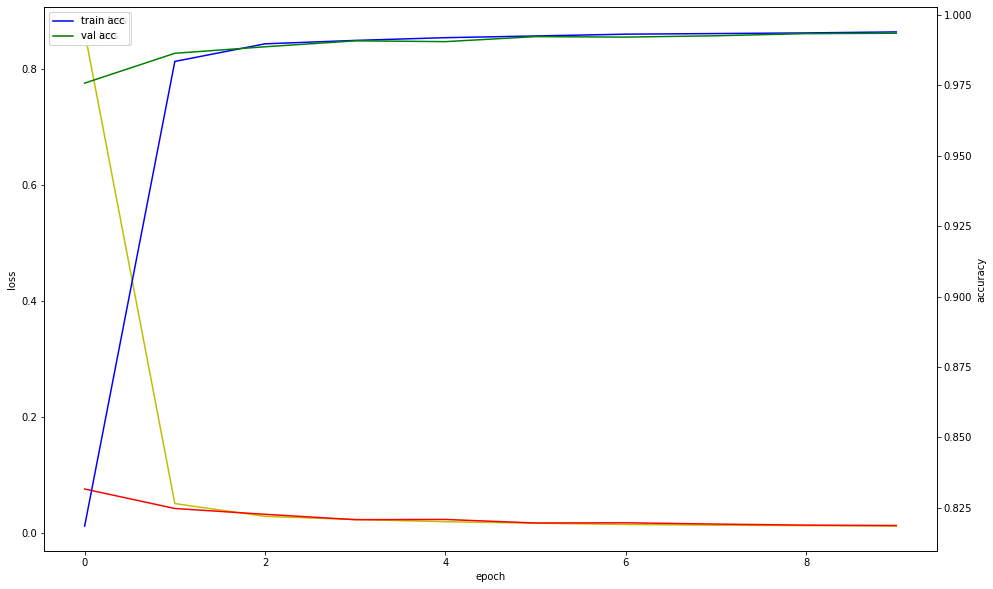

In [9]:

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
model.save('models/Korean_commercial_letter_2350_20epoch_test2.h5')